In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def remove_i(x, i):
    """Drops the ith element of an array."""
    shape = (x.shape[0]-1,) + x.shape[1:]
    y = np.empty(shape, dtype=float)
    y[:i] = x[:i]
    y[i:] = x[i+1:]
    return y

def a(i, x, G, m):
    """The acceleration of the ith mass."""
    x_i = x[i]
    x_j = remove_i(x, i) # don't compute on itself
    m_j = remove_i(m, i)
    diff = x_j - x_i
    mag3 = np.sum(diff**2, axis=1)**1.5
    # compute acceleration on ith mass
    result = G * np.sum(diff * (m_j / mag3)[:,np.newaxis], axis=0)
    return result

def timestep(x0, v0, G, m, dt):
    '''Computes the next position and velocity for all masses given 
    initial conditions and a time step size.
    '''
    N = len(x0)
    x1 = np.empty(x0.shape, dtype=float)
    v1 = np.empty(v0.shape, dtype=float)
    for i in range(N): # update locations for all masses each step
        a_i0 = a(i, x0, G, m)
        v1[i] = a_i0 * dt + v0[i]
        x1[i] = a_i0 * dt**2 + v0[i] * dt + x0[i]
    return x1, v1

def initial_cond(N, D):
    '''Generates initial conditions for N unity masses at rest
    starting at random positions in D-dimensional space.
    '''
    x0 = np.random.rand(N, D) # use random initial locations
    v0 = np.zeros((N, D), dtype=float)
    m = np.ones(N, dtype=float)
    return x0, v0, m

In [11]:
def simulate(number, dimensions, steps, G, dt):
    '''Simulate motion of n-body system over given number of timesteps.
    '''
    x0, v0, masses = initial_cond(number, dimensions)
    for step in range(steps):
        x1, v1 = timestep(x0, v0, G, masses, dt)
        x0, v0 = x1, v1

In [13]:
import time
Ns = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
runtimes = []
for N in Ns:
    start = time.time()
    simulate(N, 3, 300, 1.0, 1e-3)
    stop = time.time()
    runtimes.append(stop - start)

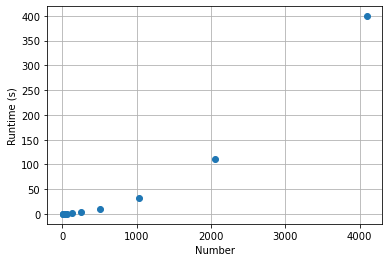

In [16]:
Ns = np.array(Ns)
plt.plot(Ns, runtimes, 'o')
plt.xlabel('Number')
plt.ylabel('Runtime (s)')
plt.grid(True)
plt.show()

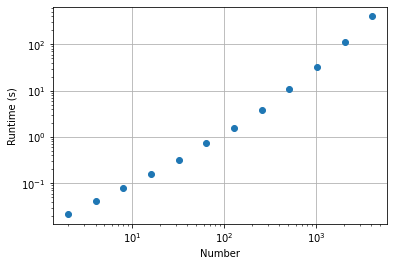

In [15]:
plt.loglog(Ns, runtimes, 'o')
plt.xlabel('Number')
plt.ylabel('Runtime (s)')
plt.grid(True)
plt.show()

If we examine the plot on a log scale, we can see that the slope shows a quadtratic trend (slope of 2).